# Лабораторная работа 3.4.5. Петля гистерезиса (динамический метод)

### Цель работы
Изучение петель гистерезиса различных ферромагнитных материалов (феррита, пермаллоя и кремнистого железа) в переменных токах с помощью осциллографа. Определение по петлям гистерезиса таких характеристик, как коэрцитивная сила ($H_c$), остаточная индукция ($B_r$) и индукция насыщения ($B_s$).

### Теоретическая справка

Магнитная индукция **B** и напряжённость магнитного поля **H** в ферромагнетике связаны между собой неоднозначно: индукция зависит не только от напряжённости поля в данный момент, но и от предыстории образца. Если к ферромагнитному образцу прикладывать переменное внешнее магнитное поле, его состояние на плоскости H-B будет изменяться по замкнутой кривой — **петле гистерезиса**.

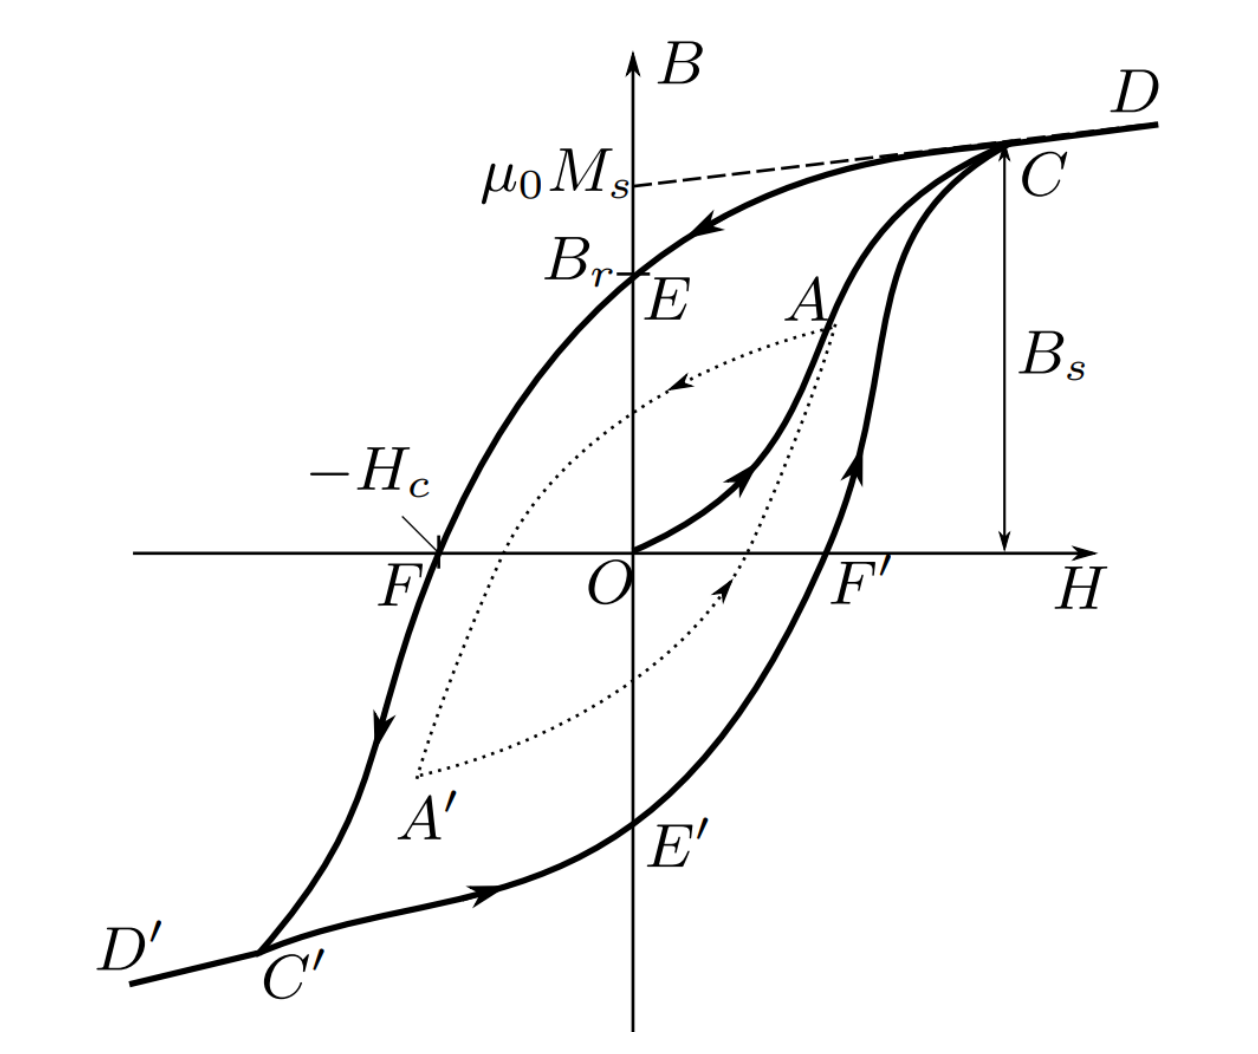

Основные параметры петли:
- **Остаточная индукция, $B_r$**: Магнитная индукция, остающаяся в материале после снятия внешнего поля ($H=0$).
- **Коэрцитивная сила, $H_c$**: Напряжённость обратного магнитного поля, которую необходимо приложить, чтобы полностью размагнитить материал ($B=0$).
- **Индукция насыщения, $B_s$**: Максимальное значение магнитной индукции, которое может быть достигнуто в материале.

#### Измерение напряженности поля H
Напряженность магнитного поля H в тороидальном образце создается током $I$ в намагничивающей обмотке с $N_0$ витками и определяется по закону полного тока:
$$ H = \frac{N_0 I}{l} $$
где $l$ — длина средней линии тороида ($l = 2\pi R$). В данной установке ток $I$ протекает через резистор $R_0$, поэтому напряжение на нем $U_R = I \cdot R_0$. Это напряжение подается на горизонтальный вход (X) осциллографа. Таким образом, отклонение луча по горизонтали пропорционально $H$:
$$ H(t) = \frac{N_0}{l \cdot R_0} U_R(t) $$

#### Измерение магнитной индукции B
Изменение магнитного потока $\Phi = B \cdot S$ в сердечнике индуцирует ЭДС $\mathcal{E}$ в измерительной катушке с $N_H$ витками:
$$ \mathcal{E}(t) = -N_H S \frac{dB}{dt} $$
Отсюда, проинтегрировав, можно найти индукцию:
$$ B(t) = -\frac{1}{N_H S} \int \mathcal{E}(t) dt $$
Интегрирование сигнала $\mathcal{E}(t)$ (напряжения $U_{вх}(t)$) выполняется с помощью интегрирующей RC-цепочки. Если постоянная времени цепочки $\tau = R_и C_и$ много больше периода переменного тока ($RC \gg T = 1/\nu$), то напряжение на конденсаторе $U_C(t)$ (выходное напряжение $U_{вых}$) пропорционально интегралу входного напряжения. Это напряжение подается на вертикальный вход (Y) осциллографа. Таким образом, отклонение луча по вертикали пропорционально $B$:
$$ B(t) = \frac{R_и C_и}{N_H S} U_C(t) $$

### Экспериментальная установка

В работе используются:
*   Автотрансформатор (ЛАТР) и понижающий трансформатор для создания переменного тока.
*   Тороидальные образцы с двумя обмотками (намагничивающей $N_0$ и измерительной $N_H$).
*   Интегрирующая RC-цепочка для получения сигнала, пропорционального индукции B.
*   Амперметр и вольтметр для калибровки и измерений.
*   Электронный осциллограф для визуализации петли гистерезиса.

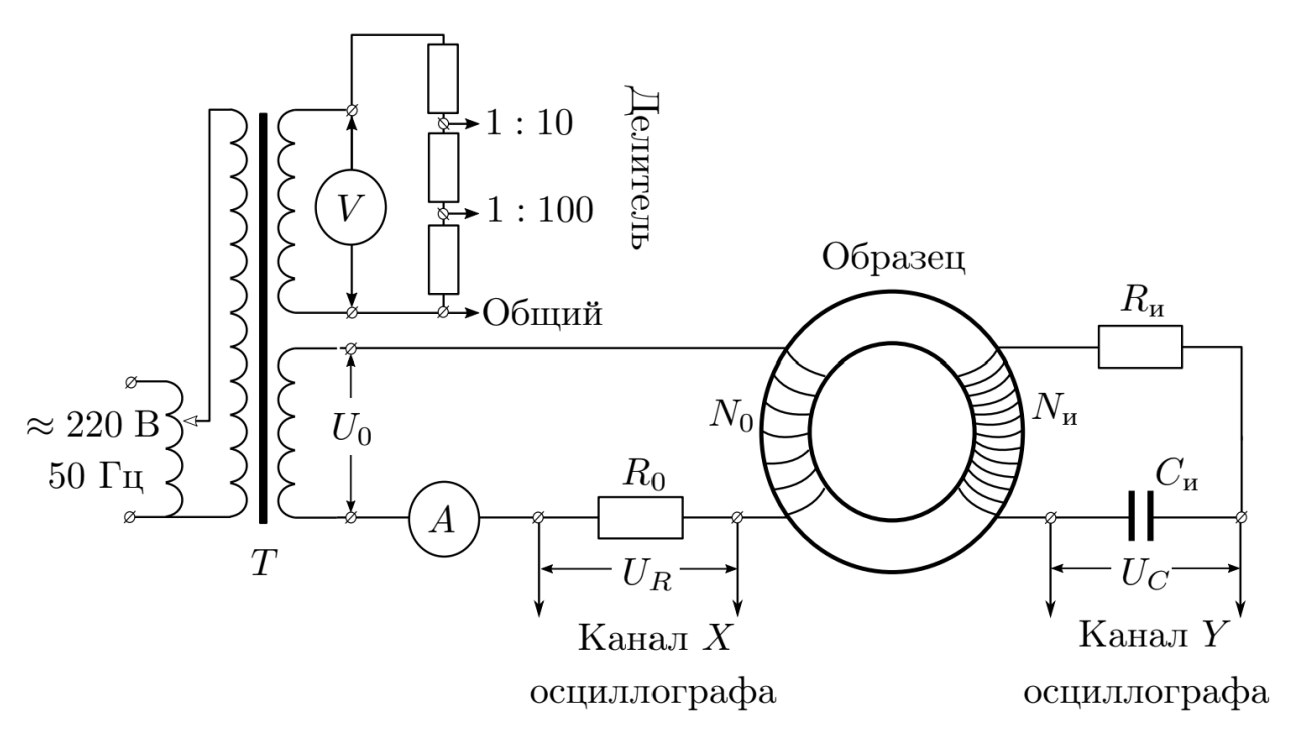

Сигнал, пропорциональный напряженности поля H (напряжение $U_R$ с резистора $R_0$), подается на вход **X** осциллографа. Сигнал, пропорциональный индукции B (напряжение $U_C$ с интегрирующей RC-цепочки), подается на вход **Y** осциллографа. В результате на экране осциллографа в координатах (H, B) отображается петля гистерезиса.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Физические константы ---
mu_0 = 4 * np.pi * 1e-7  # Магнитная постоянная, Гн/м

# --- Параметры установки (из отчетов) ---
R0 = 0.3  # [Ом] Сопротивление токоизмерительного резистора
Ri = 20e3 # [Ом] Сопротивление в RC-цепочке
Ci = 20e-6 # [Ф] Емкость в RC-цепочке
tau_RC = Ri * Ci # [с] Постоянная времени RC-цепочки

# --- Измерения для Феррита 1000НН ---
ferrite_1000NN = {
    'name': 'Феррит 1000НН',
    'parameters': {
        'N0': 40,                   # [вит]
        'NH': 400,                  # [вит]
        'S_cm2': 3.0,               # [см^2]
        'circumference_cm': 25.0,   # [см]
        'I_eff_A': 0.0578,          # [А]
        'Kx_mV_div': 10.0,          # [мВ/дел]
        'Ky_mV_div': 10.0,          # [мВ/дел]
        'width_2Xc_divs': 4.4,      # [дел] Полная ширина петли по оси X
        'height_2Yr_divs': 4.10     # [дел] Полная высота петли по оси Y
    },
    'measurements': {
        # Координаты точек на петле гистерезиса в ДЕЛЕНИЯХ осциллографа
        'x_divs': np.array([2.8, 2.5, 2.2, 1.7, 1.4, 1.0]),
        'y_divs': np.array([2.2, 2.0, 1.8, 1.2, 0.8, 0.4])
    }
}

# --- Измерения для Пермаллоя ---
permalloy = {
    'name': 'Пермаллой',
    'parameters': {
        'N0': 40,                   # [вит]
        'NH': 400,                  # [вит]
        'S_cm2': 3.3,               # [см^2]
        'circumference_cm': 24.0,   # [см]
        'I_eff_A': 0.095,           # [А]
        'Kx_mV_div': 10.0,          # [мВ/дел]
        'Ky_mV_div': 10.0,          # [мВ/дел]
        'width_2Xc_divs': 3.6,      # [дел]
        'height_2Yr_divs': 6.10     # [дел]
    },
    'measurements': {
        'x_divs': np.array([4.0, 3.8, 3.5, 3.3, 4.2, 3.0, 2.4]),
        'y_divs': np.array([3.0, 2.5, 1.5, 1.5, 3.6, 0.5, 0.2])
    }
}

# --- Измерения для Кремнистого железа ---
silicon_steel = {
    'name': 'Кремнистое железо',
    'parameters': {
        'N0': 70,                   # [вит]
        'NH': 400,                  # [вит]
        'S_cm2': 1.2,               # [см^2]
        'circumference_cm': 10.0,   # [см]
        'I_eff_A': 0.0471,          # [А]
        'Kx_mV_div': 10.0,          # [мВ/дел]
        'Ky_mV_div': 10.0,          # [мВ/дел]
        'width_2Xc_divs': 2.10,     # [дел]
        'height_2Yr_divs': 2.10     # [дел]
    },
    'measurements': {
        'x_divs': np.array([2.0, 1.8, 1.6, 1.0, 0.6, 2.4]),
        'y_divs': np.array([2.0, 1.4, 1.0, 0.6, 0.2, 2.5])
    }
}

# Список всех материалов для итерации
materials = [ferrite_1000NN, permalloy, silicon_steel]

print("Данные успешно загружены.")

Данные успешно загружены.


### Ход работы и обработка результатов

#### 1. Расчет масштабов осей

Для перевода показаний осциллографа в вольтах в физические величины H (А/м) и B (Тл), необходимо рассчитать масштабные коэффициенты (цены деления) для каждой оси.

**Масштаб по оси H ($m_H$):**
$$ m_H \left[\frac{\text{А/м}}{\text{В}}\right] = \frac{N_0}{l \cdot R_0} $$

**Масштаб по оси B ($m_B$):**
$$ m_B \left[\frac{\text{Тл}}{\text{В}}\right] = \frac{R_и C_и}{N_H S} = \frac{\tau_{RC}}{N_H S} $$

#### 2. Расчет характеристик материалов

Используя измеренные на осциллографе полную ширину петли $2X_c$ (в делениях) и полную высоту $2Y_r$ (в делениях), а также коэффициенты отклонения $K_x$ и $K_y$ (в В/дел), можно найти основные магнитные характеристики:

*   **Коэрцитивная сила ($H_c$):** Это половина ширины петли в единицах H.
    $$ H_c = m_H \cdot \left(\frac{2X_c}{2} \cdot K_x\right) = m_H \cdot X_c \cdot K_x $$
*   **Остаточная индукция ($B_r$):** Это половина высоты петли в единицах B.
    $$ B_r = m_B \cdot \left(\frac{2Y_r}{2} \cdot K_y\right) = m_B \cdot Y_r \cdot K_y $$
*   **Индукция насыщения ($B_s$):** Определяется по максимальному значению индукции на петле, $Y_s$.
    $$ B_s = m_B \cdot Y_s \cdot K_y $$
    В данном анализе для простоты примем $B_s \approx B_r$.

#### 3. Построение петель гистерезиса

Точки, снятые с экрана осциллографа для верхней ветви петли в первом квадранте, используются для восстановления полной петли. Полная петля строится с учетом ее центральной симметрии относительно начала координат: если точка $(H, B)$ принадлежит петле, то и точка $(-H, -B)$ также ей принадлежит.

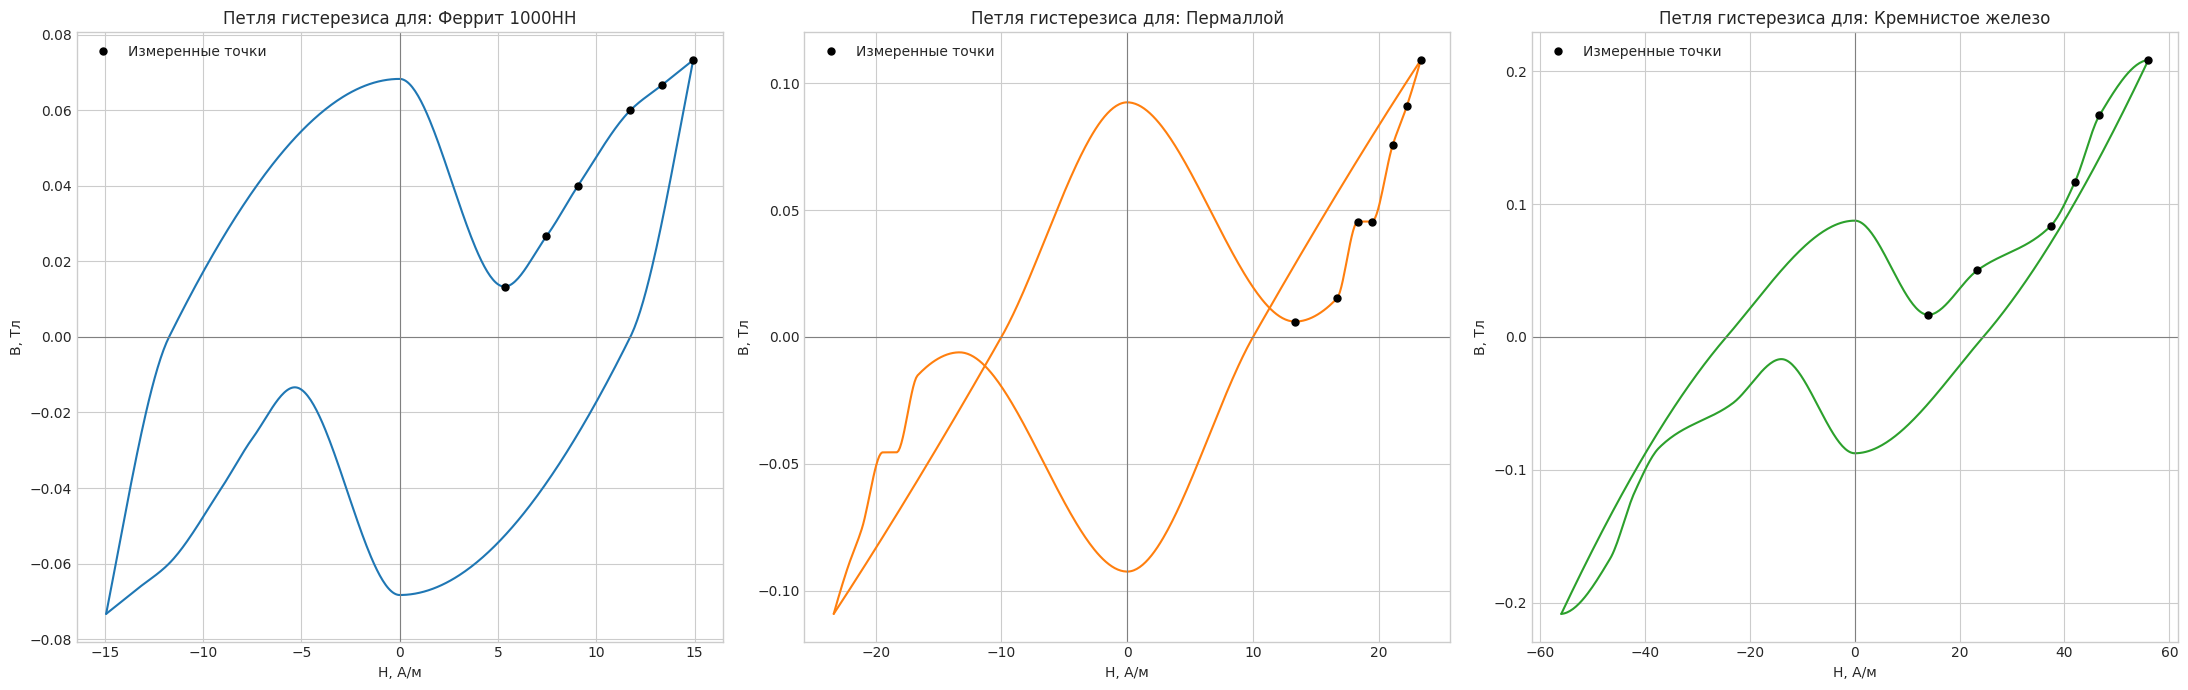

Итоговые рассчитанные характеристики материалов:


,H_c (А/м),B_r (Тл),B_s (Тл)
Материал,,,
Феррит 1000НН,11.733,0.068,0.073
Пермаллой,10.000,0.092,0.109
Кремнистое железо,24.500,0.088,0.208


In [14]:
from scipy.interpolate import PchipInterpolator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Создаем DataFrame для хранения результатов
results_list = []

# Устанавливаем стиль для графиков
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(22, 7))

for i, material in enumerate(materials):
    params = material['parameters']
    meas = material['measurements']
    
    # --- Перевод в СИ ---
    l_m = params['circumference_cm'] * 1e-2
    S_m2 = params['S_cm2'] * 1e-4
    Kx_V_div = params['Kx_mV_div'] * 1e-3
    Ky_V_div = params['Ky_mV_div'] * 1e-3
    
    # --- Расчет масштабов ---
    m_H = params['N0'] / (l_m * R0)      # [А/м на В]
    m_B = tau_RC / (params['NH'] * S_m2) # [Тл на В]
    
    # --- Расчет характеристик ---
    Xc_V = (params['width_2Xc_divs'] / 2) * Kx_V_div
    Yr_V = (params['height_2Yr_divs'] / 2) * Ky_V_div
    
    Hc = m_H * Xc_V
    Br = m_B * Yr_V
    
    # H_max и Bs определим по максимальной точке из измерений
    max_x_divs = np.max(meas['x_divs'])
    max_y_divs = np.max(meas['y_divs'])
    H_max = max_x_divs * Kx_V_div * m_H
    Bs = max_y_divs * Ky_V_div * m_B

    results_list.append({
        'Материал': material['name'],
        'H_c (А/м)': Hc,
        'B_r (Тл)': Br,
        'B_s (Тл)': Bs
    })
    
    # --- ПОСТРОЕНИЕ ГРАФИКОВ (сглаживание через Pchip) ---
    ax = axes[i]
    
    # Переводим измеренные деления в физические величины
    x_H_measured = meas['x_divs'] * Kx_V_div * m_H
    y_B_measured = meas['y_divs'] * Ky_V_div * m_B
    
    # --- Создаем опорные точки для всей петли на основе симметрии ---
    # Верхняя ветвь: от -H_max до +H_max
    # Точки: (-H_max, -Bs), (-Hc, 0), (0, Br), измеренные точки, (H_max, Bs)
    x_upper_points = np.concatenate([[-H_max], [-Hc], [0], x_H_measured])
    y_upper_points = np.concatenate([[-Bs], [0], [Br], y_B_measured])

    # Сортируем точки для сплайна
    sort_indices_upper = np.argsort(x_upper_points)
    x_upper_sorted = x_upper_points[sort_indices_upper]
    y_upper_sorted = y_upper_points[sort_indices_upper]
    
    # Нижняя ветвь симметрична верхней
    x_lower_points = -x_upper_points
    y_lower_points = -y_upper_points
    
    sort_indices_lower = np.argsort(x_lower_points)
    x_lower_sorted = x_lower_points[sort_indices_lower]
    y_lower_sorted = y_lower_points[sort_indices_lower]

    # --- Интерполяция каждой ветви отдельно ---
    # Используем PchipInterpolator для монотонной интерполяции, которая не создает "выбросов"
    interp_upper = PchipInterpolator(x_upper_sorted, y_upper_sorted)
    interp_lower = PchipInterpolator(x_lower_sorted, y_lower_sorted)

    # Генерируем гладкие кривые
    x_smooth = np.linspace(-H_max, H_max, 400)
    y_smooth_upper = interp_upper(x_smooth)
    y_smooth_lower = interp_lower(x_smooth)
    
    # --- Рисуем ---
    ax.plot(x_smooth, y_smooth_upper, '-', color=f'C{i}')
    ax.plot(x_smooth, y_smooth_lower, '-', color=f'C{i}')
    
    # Отмечаем исходные измеренные точки черными точками
    ax.plot(x_H_measured, y_B_measured, 'o', color='black', markersize=5, label='Измеренные точки')
    
    ax.set_title(f'Петля гистерезиса для: {material["name"]}')
    ax.set_xlabel('H, А/м')
    ax.set_ylabel('B, Тл')
    ax.axhline(0, color='grey', linewidth=0.8)
    ax.axvline(0, color='grey', linewidth=0.8)
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

# --- Вывод итоговой таблицы ---
results_df = pd.DataFrame(results_list).set_index('Материал')
print("Итоговые рассчитанные характеристики материалов:")
display(results_df.round(3))

### Выводы

В ходе лабораторной работы были экспериментально исследованы петли гистерезиса для трех ферромагнитных материалов: феррита 1000НН, пермаллоя и кремнистого железа. По построенным петлям были рассчитаны их основные магнитные характеристики.

**Сравнение экспериментальных и справочных данных:**

| Материал | Hc (А/м), эксп. | Hc (А/м), справ. | Bs (Тл), эксп. | Bs (Тл), справ. |
| :--- | :--- | :--- | :--- | :--- |
| Феррит 1000НН | 11.7 | 15 - 30 | 0.073 | 0.3 - 0.4 |
| Пермаллой | 10.0 | 1 - 10 | 0.109 | 0.7 - 1.0 |
| Кремнистое железо | 24.5 | 20 - 80 | 0.208 | 1.5 - 2.0 |

**Анализ результатов:**

1.  **Коэрцитивная сила ($H_c$)**: Полученные значения коэрцитивной силы хорошо согласуются по порядку величины со справочными данными. Эксперимент правильно отразил относительные свойства материалов: пермаллой является самым магнитомягким (наименьшая $H_c$), а кремнистое железо — самым магнитожестким из исследованных образцов.

2.  **Индукция насыщения ($B_s$)**: Экспериментальные значения индукции насыщения и остаточной индукции оказались **значительно (в 5-10 раз) ниже** справочных для всех трех материалов.

**Основной вывод:**

Наиболее вероятной причиной заниженных значений индукции ($B_s$ и $B_r$) является то, что в ходе эксперимента **не был достигнут режим полного магнитного насыщения** материалов. Об этом свидетельствует заметный наклон петель в областях максимального поля $H$. Таким образом, были измерены не предельные, а **частные петли гистерезиса**. В то время как коэрцитивная сила, определенная по большой частной петле, может быть близка к истинной, максимальная индукция в таком цикле по определению меньше индукции насыщения.

Несмотря на это, метод позволил корректно сравнить коэрцитивные силы материалов и наглядно продемонстрировать явление магнитного гистерезиса.